# Scaling - Cross Validation - Gridsearch

# Regularization (Ridge, Lasso, ElasticNet)

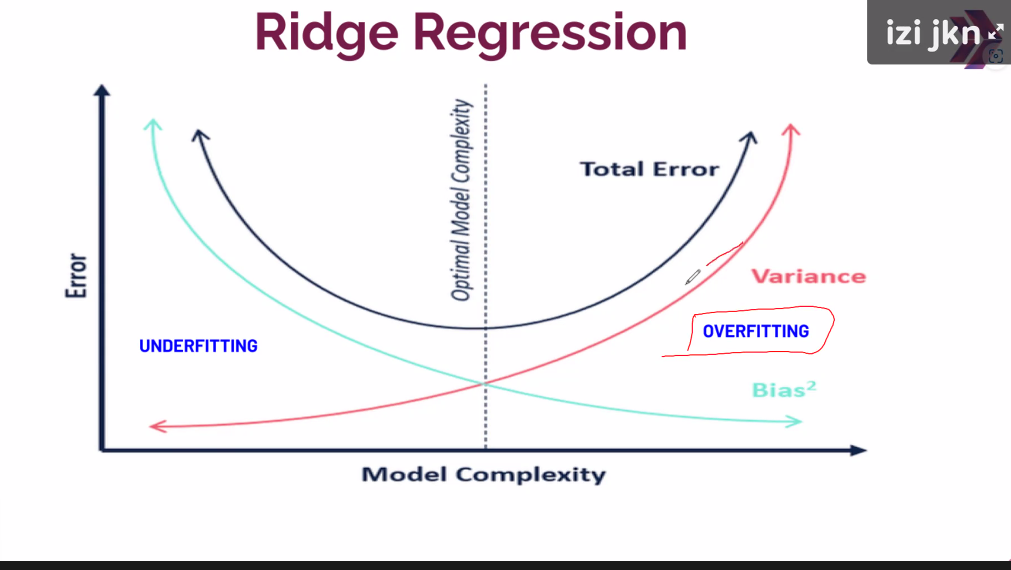

In [ ]:
#train score(r2) yüksek test score düşük ise overfitting.
#low bias high varyans
# too many features var ise overfitting den söz edebiliriz. 
#düzeltmek için regularization yapıyoruz..hata ekliyoruz.. ya da featureları azaltıyoruz..
#istenen durum low bias low varyans

In [ ]:
#Regularization hata ekleyerek duzeltme diyebiliriz.
#Hata eklediğimizde modelde ne değişiyor.katsayılarla oynamış oluyoruz.
#bias ve variance dengeleniyor. train ve test birbirine yaklaşıyor.
#yani aslında kendimizi kandırmıyoruz, ezberden genellemeye çevirmiş oluyoruz modeli
#kısaca eklenen hata değeri bias değerini değiştirerek line'ın shift edilmesini yani kaydırılmasını sağlıyor
#ridge regression katsayıları öldürmez ama süründürür. yani Ridge regressionda katsayılar küçülebildiği kadar küçültür. Ama asla sıfır olmaz.

#kare = 2 ---- > L2  -----> Ridge
#abs = | = 1 ------> L1 ------> Lasso

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop(columns = "sales", axis =1)
y = df["sales"]

### Polynomial Conversion

In [5]:
from sklearn.preprocessing import PolynomialFeatures

We create an artificial overfiting situation by taking poly feature from 5 degrees

In [6]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

# Konumuz regularization olduğundan bir önceki dersimizden overfit olduğunu bildiğimiz degree 5 poly featurlarlı datamızı
# elde ediyoruz ve sonrasında bu dataya regularization uygulayarak overfitingi gidermeye çalışacağız.

In [7]:
poly_features.shape

(200, 55)

### Train | Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

## Scaling the Data

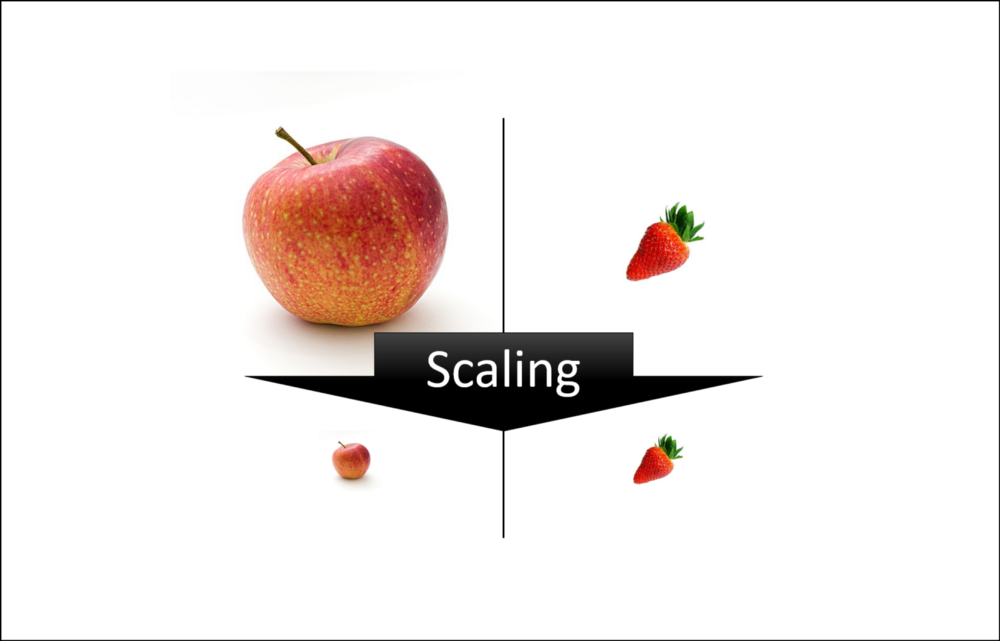

In [10]:
#Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.
#feature scaling farklı scalalardaki futureları aynı scalaya almak
#scaling SVM ve KNN gibi distance base modellerde onemli

#genel kural : train datasından öğren ,test datasında kullan

In [11]:
# HİÇ BİR ZAMAN BİR DÖNÜŞÜM, ÖĞRENME vb... 
#İŞLEMLER SUPERVISED LEARNINGDE TÜM DATAYA UYGULANMAZ

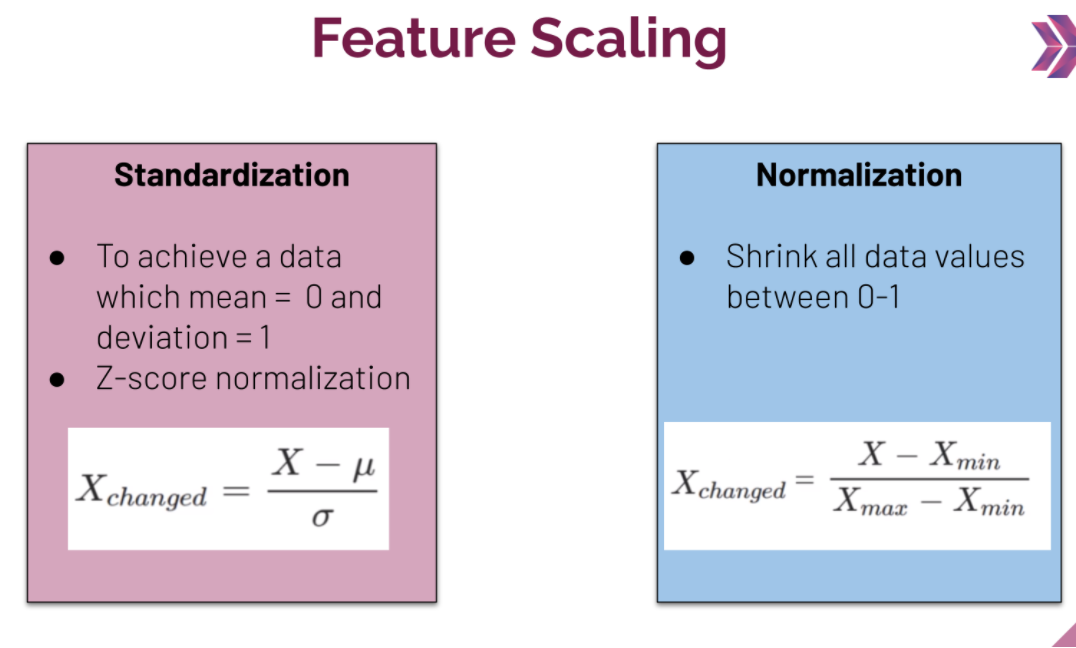

In [12]:
#scaling önemi:
    #1)featureları aynı range içerisine almak
    #2)grading desecent alg. daha hızlı çalışır
    #3)SVM KNN daha sağlıklı sonuç verir

In [27]:
#scale ile x_train eğitiliyor .. x_testte ise transform yapıyoruz..
#x_trainde fit yapıp x_testte dönüşüm yapıyoruz.

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

# En fazla yukarıda import ettiğimiz 3 scale algoritması kullanılır. Robustscaler datamızda outlier değerler varsa tercih
# edilebilir.

# Hangi scale algortimasını kullanmalıyım?
# Best practice olarak standartscale ve minmax scale algoritmları sırasıyla denenir hangisi iyi sonuç veriyorsa onunla 
# devam edilir Outlier sorununuz varsa robustscale tercih edilebilir. Ancak outlier sorununuz olsa bile tüm scale 
# algortimalarını deneyip en iyi sonucu veren scale algortiması ile devam etmenizi tavsiye ediyoruz.

In [14]:
scaler.fit(X_train) #scaler.fit_transform(X_train) 

# fit işlemi ile tercih ettiğimiz scale algortimasının yukarıda belirtilen dönüşüm formülleri oluşturulur.
# transform ile ilgili bilgiler formüle konularak dönüşüm sağlanır.

# fit işlemi sadece train setine uygulanır ve train setindeki bilgilere istinaden hem train hem de test setine dönüşüm
# uygulanur.

# test setine train setinin bilgileri ile dönüşüm uygulamazsak train ve test setindeki gözlemler farklı değerler
# alacağından predictionlarımız yanlış çıkacaktır.

StandardScaler()

In [15]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [16]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

# train setinin mean ve std bilgileri ile train setine scaling işlemi yapıyoruz.

array([[-0.40424839, -1.02823707, -0.33767538, ..., -0.44017978,
        -0.35817255, -0.28930697],
       [ 0.32060772, -0.91982774, -1.16143931, ..., -0.44391152,
        -0.36370582, -0.29622876],
       [-1.27051084,  0.2591237 ,  0.25425079, ..., -0.28157937,
        -0.26073421, -0.24008316],
       ...,
       [ 0.80424121,  0.71986334,  1.43317042, ...,  0.7705482 ,
         0.6680601 ,  0.45733704],
       [ 0.1851428 , -0.87239866, -0.60897488, ..., -0.44115811,
        -0.36130657, -0.29446003],
       [ 1.54692165, -0.86562307, -0.42153159, ..., -0.43876277,
        -0.35836127, -0.29150925]])

In [17]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

# train setinin mean ve std bilgileri ile test setine scaling işlemi yapıyoruz.

array([[ 0.15781217,  0.59112727,  1.13227461, ...,  0.33494015,
         0.26526052,  0.14042253],
       [ 0.53925283,  1.68199613,  1.13227461, ...,  1.33091017,
         0.5857351 ,  0.14042253],
       [ 1.69783431,  0.36753303,  0.65380096, ..., -0.10377617,
        -0.11321161, -0.13764621],
       ...,
       [ 1.46968288,  0.40818653,  1.46769945, ...,  0.49244978,
         0.5693803 ,  0.50311419],
       [-0.38998892, -0.55394626, -1.21076649, ..., -0.44385169,
        -0.36371371, -0.29623523],
       [-1.45588388, -1.44154763, -0.45606062, ..., -0.44391134,
        -0.36299878, -0.292234  ]])

### checking std = 1 and mean = 0

this gives us the z-scores. so it's also called z-score scaling

These values show where in the normal distribution they correspond to the z score.


In [18]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round(3)

# train setine yapılan dönüşüm train setinin bilgileri ile yapıldığından tüm featurların mean'i 0 std'ları ise 1 olmuştur

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000
std,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003


In [19]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round(3)

# test setindeki featurların bazılarında mean 0'dan, std ise 1'den daha büyük değerler almaktadır. Bu farklılık tarin
# setindeki featurların range ile test setindeki featurların range farklı olduğunda mean 0'dan std 1'den uzaklaşır.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.177,0.132,0.15,-0.124,-0.013,0.078,0.134,0.132,0.309,-0.096,-0.005,0.081,0.037,0.053,0.172,0.129,0.121,0.253,0.454,-0.084,-0.004,0.079,0.029,0.041,0.130,0.060,0.045,0.094,0.203,0.126,0.103,0.231,0.379,0.579,-0.08,-0.012,0.072,0.014,0.029,0.104,0.042,0.023,0.048,0.124,0.076,0.038,0.076,0.109,0.207,0.127,0.086,0.203,0.355,0.497,0.682
std,1.087,1.023,1.33,1.021,1.074,1.200,1.051,1.239,1.701,0.975,1.004,1.140,1.069,1.028,1.203,1.092,1.185,1.605,2.209,0.946,0.920,1.070,0.961,0.923,1.057,1.101,0.996,0.971,1.158,1.133,1.153,1.537,2.113,2.781,0.93,0.853,1.003,0.834,0.826,0.929,0.966,0.853,0.806,0.916,1.149,1.012,0.952,0.897,1.102,1.171,1.140,1.467,2.036,2.708,3.371


## Min Max values for each feature

### Test set min max values

In [20]:
pd.DataFrame(X_test_scaled).agg(["min", "max"]).round(3)

# 18'inci featurın mean ve std bilgileri neden bu kadar farklı çıkmış sorunun cevabını aşağıda görüyoruz.
# train setindeki gözlemler -0.560 ile 7.706 arasındayken test setinde -0.560 ile 11.362 arasında olduğundan kaynaklanıyor

# test setindeki gözlemler, train setinin min, max değerleri arasındaysa test setinin mean 0, std 1'e yakın değerler çıkar.
# test setindeki gözlemler, train setinin min, max değerlerinin dışındaysa test setinin mean 0, std 1'den daha büyük
# değerler çıkar

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
min,-1.718,-1.442,-1.433,-1.162,-1.043,-0.965,-1.015,-0.890,-0.826,-0.915,-0.808,-0.723,-0.781,-0.670,-0.585,-0.815,-0.713,-0.631,-0.560,-0.770,-0.671,-0.587,-0.630,-0.524,-0.449,-0.651,-0.567,-0.470,-0.387,-0.699,-0.621,-0.555,-0.475,-0.401,-0.672,-0.581,-0.498,-0.537,-0.436,-0.369,-0.537,-0.455,-0.369,-0.300,-0.569,-0.513,-0.435,-0.338,-0.27,-0.619,-0.558,-0.510,-0.444,-0.364,-0.296
max,1.698,1.797,4.146,2.210,2.204,3.288,2.336,3.783,7.387,2.618,1.979,2.994,2.847,2.945,4.259,2.779,3.635,7.013,11.362,2.954,2.364,2.962,2.532,2.914,3.750,3.353,3.242,3.181,4.524,3.160,3.651,6.170,10.974,15.680,3.235,2.667,2.970,2.092,2.691,3.128,3.012,2.590,3.001,3.819,3.781,3.900,2.937,3.070,4.29,3.493,3.965,5.494,10.014,15.349,19.999


### Train set min max values

In [21]:
pd.DataFrame(X_train_scaled).agg(["min", "max"]).round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
min,-1.774,-1.550,-1.462,-1.164,-1.057,-0.967,-1.019,-0.899,-0.826,-0.915,-0.809,-0.723,-0.782,-0.672,-0.585,-0.815,-0.715,-0.631,-0.560,-0.770,-0.671,-0.587,-0.630,-0.524,-0.449,-0.651,-0.567,-0.470,-0.387,-0.699,-0.621,-0.555,-0.475,-0.401,-0.672,-0.581,-0.498,-0.537,-0.436,-0.369,-0.537,-0.455,-0.369,-0.300,-0.569,-0.513,-0.435,-0.338,-0.270,-0.619,-0.558,-0.51,-0.444,-0.364,-0.296
max,1.739,1.811,3.500,2.291,3.033,5.434,2.364,3.217,5.607,2.746,3.496,6.343,3.760,5.258,8.083,2.822,3.855,5.308,7.706,3.136,3.760,7.031,4.345,6.135,9.050,4.351,4.588,7.883,10.069,3.223,4.400,4.641,7.398,9.467,3.474,4.064,7.564,4.663,6.719,9.629,5.036,5.410,8.740,10.786,4.854,4.524,7.237,9.909,11.281,3.577,4.870,5.41,6.689,9.200,10.727


## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [23]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [26]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

# her algoritmadan aldığımız metric scorları karşılaştırmak için bu scorları bir değişkene atayıp daha sonra aşağıda 
# bu scoreları concate edip yorumlayacağız.
#burayı yorumlarsak açıkça overfit oldugunu görüyoruz.

,linear_train,linear_test
R2,0.997581,-1.423718
mae,0.187958,2.107643
mse,0.062748,76.501251
rmse,0.250495,8.746499


## Multicolineratiy

If there is a strong correlation between the independent variables, this situation is called **multicolineraty**.
 
**Multicolineraty** prevents my model from detecting important features.

In [27]:
def color_red(val):
    
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
pd.DataFrame(poly_features).corr().style.applymap(color_red)

# Featurların kendi arasındaki corr. -0.90, +0.90 'dan büyük olan değerleri istediğimiz renkte göstermesi için
# internettte bulduğumuz kullanışlı bir kodu kullanıyoruz. Sizlerde internet üzerinden işinize yarayacak kodları kendi
# notebookunuza uyarlayarak kullanabilirsiniz

# Multicolineraty sorunu linear ve logisitc reg. gibi gradient descent tabanlı modellerde bir problem olarak karşımıza
# çıkar. Multicolineraty sorunu olan datalarda elde ettiğimiz scorelar farklı çıkmayacaktır. Ancak bir feature selection
# yapacaksak bu sorunu mutlaka gidermemiz gerekiyor. Regulirazition algoritmaları overfiting problemini giderdiği gibi
# multicolineraty sorununu da giderir.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

## Cross Validate

We do cross-validation to check whether the one-time scores we receive are consistent or not. It answers the question of whether we can get similar scores in different parts of the data.

cross validation is only applied to the train set.

In [51]:
#cross vald. = test işlemini sadece test verisinden değil de train data'dan da farklı sample'lar seçerek yapmış oluyoruz...
#gridsearch  modeli tune ederken bizim sectigimiz hyperparametre uzayindan en iyisini secer

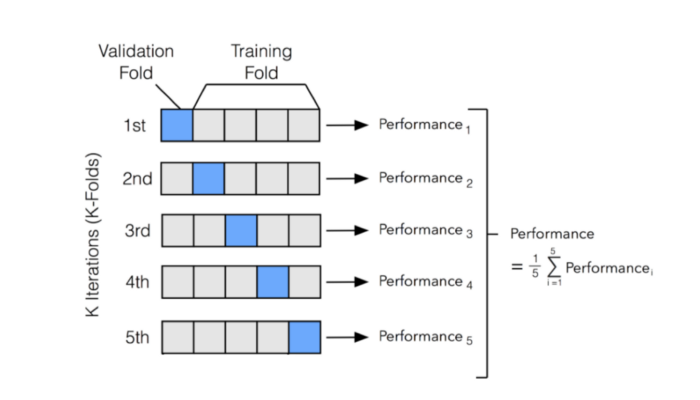

In [28]:
from sklearn.metrics import SCORERS
SCORERS.keys()

# Cross validation ve gridsearchCV işlemlerinde kullanabileceğimiz metric isimleri aşağıdaki şekliyle yazılmalı
# aksi taktirde hata alırsınız.

# mae, mse, rmse metriclerinin başında neg ibaresinin bulunma sebebi:
# sklearn algoritmaları scorları maximize etmek üzere dizayn edilmiştir. Ancak mae, mse, rmse metricleri minimize olması 
# gereken metricler olduğundan sklearn bu metricleri negatif eksene kaydırırarak maximize etmeye çalışır.

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [29]:
from sklearn.model_selection import cross_validate, cross_val_score

# cross_validate, cross_val_score iki fonksiyon da CV işlemi için kullanılabilir. Ancak cross_val_score tek bir metric için
# score döndürürken, cross_validate birden fazla metric için score döndürebilir. Bu sebeple sıklıkla
# tercih edilir.

In [30]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error'], cv = 10, return_train_score=True)

# Her Cross Validation öncesi modeli mutlaka sıfırlıyoruz. Aksi taktirde dataleakage tehlikesi vardır.

# Overfiting kontrolü train seti içerisinde yapılacaktır. train seti içerisinden elde edeceğimiz validation ve train
# setlerinin ortalamaları alınarak bulunan scorelar karşılaştırılarak overfiting olup olmadığı tespit edilir.

# CV'in her iterasyonundaki train scorlarını da alabilmek için return_train_score=True olarak seçilir.

In [31]:
scores 
# scorlar json formatında döndürülür.

{'fit_time': array([0.00200534, 0.00200057, 0.00200057, 0.00100088, 0.00200057,
        0.00100017, 0.00200081, 0.00100017, 0.00200033, 0.00100017]),
 'score_time': array([0.00099301, 0.0010004 , 0.        , 0.00099993, 0.00100017,
        0.0010004 , 0.        , 0.00100017, 0.00100064, 0.00100017]),
 'test_r2': array([ 0.94345854,  0.98360242,  0.97961969, -5.69207862,  0.99353704,
         0.99682955,  0.9907342 ,  0.99244878,  0.97990659,  0.99041525]),
 'train_r2': array([0.99772768, 0.99798944, 0.99774108, 0.99785192, 0.99779843,
        0.99751821, 0.99776809, 0.99746136, 0.9977302 , 0.99781087]),
 'test_neg_mean_absolute_error': array([-0.38633232, -0.45398645, -0.43863405, -3.57023678, -0.30378975,
        -0.27952145, -0.33635204, -0.4075215 , -0.44307322, -0.26112228]),
 'train_neg_mean_absolute_error': array([-0.18751993, -0.16968183, -0.18401554, -0.1794792 , -0.17537787,
        -0.18448179, -0.17882463, -0.18987238, -0.18213515, -0.18638233]),
 'test_neg_mean_squared_erro

In [32]:
pd.DataFrame(scores, index = range(1,11))

# json formatını daha okunaklı hale getirmek için score datasını df içerisine veriyoruz

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.002005,0.000993,0.943459,0.997728,-0.386332,-0.187520,-0.283944,-0.060925,-0.532864,-0.246830
2,0.002001,0.001000,0.983602,0.997989,-0.453986,-0.169682,-0.390895,-0.051659,-0.625216,-0.227286
3,0.002001,0.000000,0.979620,0.997741,-0.438634,-0.184016,-0.364728,-0.060050,-0.603927,-0.245050
4,0.001001,0.001000,-5.692079,0.997852,-3.570237,-0.179479,-166.686869,-0.055581,-12.910727,-0.235755
5,0.002001,0.001000,0.993537,0.997798,-0.303790,-0.175378,-0.153806,-0.056749,-0.392181,-0.238220
6,0.001000,0.001000,0.996830,0.997518,-0.279521,-0.184482,-0.104168,-0.062363,-0.322751,-0.249726
7,0.002001,0.000000,0.990734,0.997768,-0.336352,-0.178825,-0.200500,-0.058872,-0.447772,-0.242635
8,0.001000,0.001000,0.992449,0.997461,-0.407521,-0.189872,-0.308899,-0.061348,-0.555787,-0.247685
9,0.002000,0.001001,0.979907,0.997730,-0.443073,-0.182135,-0.610626,-0.057327,-0.781426,-0.239430
10,0.001000,0.001000,0.990415,0.997811,-0.261122,-0.186382,-0.123434,-0.059946,-0.351331,-0.244838


In [33]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

# train seti içerisinden elde ettiğimiz yeni train ve validation setlerinden elde ettiğimiz metriclerin ortalamasını
# alıyoruz.

test_r2                               0.315847
train_r2                              0.997740
test_neg_mean_absolute_error         -0.688057
train_neg_mean_absolute_error        -0.181777
test_neg_mean_squared_error         -16.922787
train_neg_mean_squared_error         -0.058482
test_neg_root_mean_squared_error     -1.752398
train_neg_root_mean_squared_error    -0.241746
dtype: float64

In [34]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

# train_val fonksiyonundan aldığımız train ve test seti scorları bize datamızda overfiting olup olmadığına dair insight 
# verir. Ancak gerçekten overfiting olup olmadığı yukarıda gösterdiğimiz gibi CV'dan alınan train ve validaiton scorlarının
# karşılaştırılması ile yapılır.

# Ayrıca, müşteriye vereceğimiz aşağıdaki test scorlarının gerçekten tutarlı scorlar olup olmadığının kontrolünü CV'dan
# aldığımız validaiton scorları ile karşılaştırarak yapıyoruz. Scorlar biribirine yakınsa skorlar tutarlı, değilse scorlar
# tutarsız diyoruz.

,linear_train,linear_test
R2,0.997581,-1.423718
mae,0.187958,2.107643
mse,0.062748,76.501251
rmse,0.250495,8.746499


In [35]:
lm.coef_

# yaptığımız regularization işlemlerinin katsayıları nasıl etkilediğini de görmek için bir değişkene atayıp aşağıda 
# karşılaştırmalarını yapacağız.

array([ 16.59727508,  -5.40405972,  -1.74928347, -62.33833778,
        16.90858661, -17.0396797 ,  18.33163138,  17.36342203,
        13.11462122, 111.07662344, -22.81391604,  44.26971429,
       -14.94945789, -26.02529709,  32.27766406, -29.6922559 ,
       -17.88079357, -30.82621205, -35.40557097, -93.69458809,
        27.30198689, -49.13969978, -10.86611732,  44.48527329,
       -55.26045722,  24.00912753,   1.98877056,  14.83064039,
       -16.4443257 ,  24.55166492,   2.88839217,  27.34790657,
        21.76432967,  42.14254255,  29.91636033, -12.96100179,
        20.98438147,  12.13988278, -26.82413453,  26.51197649,
        -7.92317222,   4.38181124,  -7.34055459,  14.14705248,
        -4.83551241,  -4.8904204 ,   2.54950883, -11.77617458,
         7.74633833, -10.15349317,   8.1863474 , -17.73958393,
         1.13383523,  -8.53196007, -20.74476395])

In [36]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

# okunuşunu kolaylaştırıp concate yapabilmek için df'e dönüştürdük.

,lm_coef
0,16.597275
1,-5.404060
2,-1.749283
3,-62.338338
4,16.908587
5,-17.039680
6,18.331631
7,17.363422
8,13.114621
9,111.076623


## Ridge Regression

Ridge and lasso and elastic-net regression are a model tuning method that is used to analyse any data that suffers from multicollinearity, underfiting (If there is an underfiting caused by the alpha parameter) and overfiting. 

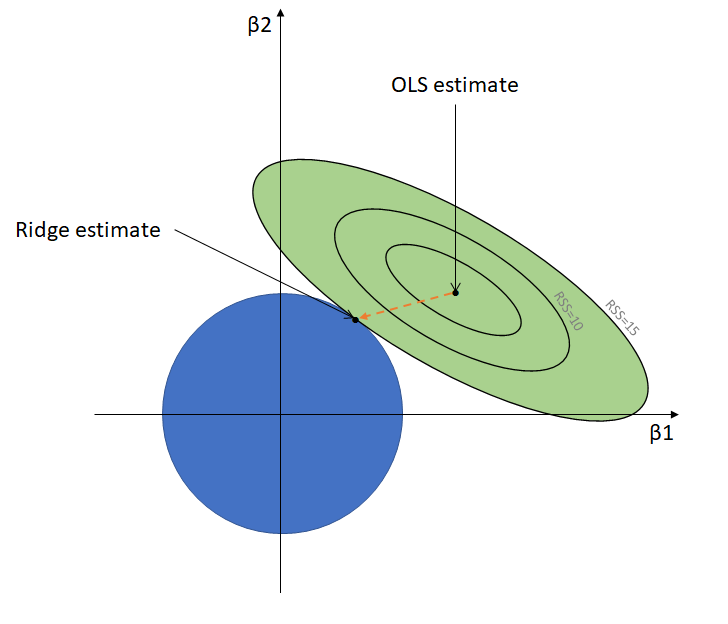

In [37]:
#yukarıda train ve test hataları birbirine yaklaşıyor...

In [38]:
from sklearn.linear_model import Ridge

In [39]:
ridge_model = Ridge(alpha=1)

#alpha arttıkça regularization da artar
# alpha reg. hyper parametresidir. Bu deger büyüdükçe uygulanan reg. kuvveti artar. overfitingi yenmek için 
# bu hyper parameter artırılmalıdır.

In [40]:
ridge_model.fit(X_train_scaled, y_train)

# ridge reg.algortimasında eğitim yapacağımız data mutlaka scale edilmiş olmalıdır.Bu işlem tüm featurlara model tarafından
# eşit ağırlıklandırma yaparak hem multicolinarity sorununu gideriyor hemde featureları önemli önemsiz olarak 
# gruplandırabiliyor


Ridge(alpha=1)

In [42]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [43]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

# data ridge algoritmasında modele sokulduktan sonra overfitingin giderildiğine dair bir insight elde ediyoruz.
# Kesin ve nihai kontrolümüzü CV'da yapacağız.
# aşagıdaki scorelardan r2 den ezberlemeyip ögrendiğini görüyoruz..mae ile rmse birbirine yakın ki istenen de bu.

,ridge_train,ridge_test
R2,0.987205,0.984232
mae,0.364623,0.557799
mse,0.331859,0.497710
rmse,0.576072,0.705486


In [44]:
pd.concat([ls, rs], axis=1)

# linear ve ridge modellerinden aldığımız scorları concat ediyoruz.
# Görüldüğü gibi train setine bir miktar bias (error) ilave ederek train ve test seti arasındaki farkı (varience)
# azaltıyoruz (bias-variance trade-off)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.997581,-1.423718,0.987205,0.984232
mae,0.187958,2.107643,0.364623,0.557799
mse,0.062748,76.501251,0.331859,0.497710
rmse,0.250495,8.746499,0.576072,0.705486


## For Ridge Regression CV with alpha : 1 

In [45]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

# Default alpha değerimize göre CV'dan scorlarımızı alıyoruz.
#neg yazmamızın sebebi model normalde değerleri maximize etmeye çalışıyor, dolayısıyla errorları maximize etmemesi için..

In [46]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.001002,0.001652,0.909424,0.987075,-0.554577,-0.357851,-0.454859,-0.346534,-0.674433,-0.588671
2,0.000000,0.001001,0.988384,0.986841,-0.407609,-0.368516,-0.276898,-0.338107,-0.526211,-0.581470
3,0.001001,0.001001,0.985714,0.987132,-0.415267,-0.365436,-0.255661,-0.342068,-0.505629,-0.584866
4,0.001000,0.001000,0.920100,0.987767,-0.763229,-0.358082,-1.990155,-0.316532,-1.410728,-0.562611
5,0.001000,0.001001,0.995553,0.986184,-0.257907,-0.376688,-0.105827,-0.356141,-0.325311,-0.596775
6,0.001000,0.001000,0.977663,0.987187,-0.388813,-0.365154,-0.733912,-0.321978,-0.856687,-0.567431
7,0.000000,0.001000,0.992759,0.986392,-0.365033,-0.376714,-0.156693,-0.358936,-0.395845,-0.599113
8,0.000000,0.001000,0.993167,0.985360,-0.439520,-0.365369,-0.279522,-0.353782,-0.528698,-0.594796
9,0.000000,0.001001,0.915947,0.991464,-0.754910,-0.329176,-2.554330,-0.215583,-1.598227,-0.464309
10,0.001000,0.001000,0.985719,0.987017,-0.338109,-0.371542,-0.183907,-0.355516,-0.428843,-0.596251


In [47]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

# train ve validation seti scorlarının biribirlerine yakın olduğunu görüyoruz ve artık overfiting olmadığına kesin
# kanaat getiriyoruz.

test_r2                              0.966443
train_r2                             0.987242
test_neg_mean_absolute_error        -0.468497
train_neg_mean_absolute_error       -0.363453
test_neg_mean_squared_error         -0.699176
train_neg_mean_squared_error        -0.330518
test_neg_root_mean_squared_error    -0.725061
train_neg_root_mean_squared_error   -0.573629
dtype: float64

In [48]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

# CV'dan aldığımız validation scorları ile test seti scorlarının biribirine yakın olduğunu görüyoruz. Bu şekilde
# test seti scorlarımız da teyit etmiş olduk.

,ridge_train,ridge_test
R2,0.987205,0.984232
mae,0.364623,0.557799
mse,0.331859,0.497710
rmse,0.576072,0.705486


In [49]:
ridge_model.coef_

# ridge algoritmasının katsayıları nasıl değiştirdiği gözlemlemek için önce katsayılarımızı alarak df'e çevirip sonrada 
# linear algoritmasından aldığımız katsayılarla karşılaştırmak üzere concat edeceğiz.

array([ 3.71450604e+00,  6.75147866e-01,  2.45026233e-01, -1.03692214e+00,
        2.49619996e+00,  2.50747065e-01, -3.80972752e-02,  1.63781753e-01,
       -1.92793081e-01, -1.06022676e+00, -6.67857903e-02, -8.12695795e-01,
        1.25026950e+00,  4.88024688e-02,  1.10978317e-01, -3.07452443e-01,
        9.43623052e-02, -8.78442019e-02,  1.78689946e-04, -2.82098333e-01,
        1.79583653e-02, -2.63853784e-01, -4.24176994e-01, -2.44464854e-01,
       -1.13438874e-01,  6.99959186e-01, -1.51234093e-01, -8.44789444e-03,
        1.09260084e-01, -3.00740259e-01,  1.18474476e-01, -1.99970798e-02,
        1.00228457e-02,  6.94485746e-02,  4.49056790e-01,  4.73744361e-01,
        4.37318666e-01, -1.85196676e-01,  2.84736636e-01,  2.57367999e-01,
       -6.40738959e-01, -1.85031251e-01,  1.42459291e-01, -2.09667359e-03,
        4.09916098e-01, -2.01252496e-01,  3.47886931e-03,  6.83023968e-02,
       -1.15775095e-01, -1.65831448e-01,  1.58292458e-01,  3.60547037e-03,
        1.65384202e-03, -

In [50]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])#1 yazmamızın sebebi alpha nın 1 olması..

In [51]:
pd.concat([lm_df,rm_df], axis = 1)

# Gördüğünüz gibi ridge algortiması tüm katsayıları küçültmüş nispeten önemsiz olan katsayıları 0'a daha fazla 
# yakınlaştırmış. Bu sebeple ridge üzerinden kesinlikle feature selection yapılmaz. Ridge üzerinden sadece featurları
# önemli ve önemsiz olarak gruplandırabiliriz.

,lm_coef,ridge_coef_1
0,16.597275,3.714506
1,-5.404060,0.675148
2,-1.749283,0.245026
3,-62.338338,-1.036922
4,16.908587,2.496200
5,-17.039680,0.250747
6,18.331631,-0.038097
7,17.363422,0.163782
8,13.114621,-0.192793
9,111.076623,-1.060227


## Choosing best alpha value with GridSearchCV for Ridge

In [52]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV algortimasını ML modelimiz için en iyi metric sonuçlarını döndürecek hyper paremetreyi bulmak
# için kullanılır. Birden fazla hyperparametremiz olsaydı en iyi sonucu dönderen hyperparametre kombinasyonlarını
# bulacaktı.

In [53]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

# GridsearchCV(GS) algortiması öncelikle ilgili hyperparametre (HP) için bir uzay aralığı ister. Bunun için GS'e 
# vereceğimiz uzay aralığını belirliyoruz. (0.01 ile 1 arasında eşit aralıklarla bölünmüş 100 farklı değer veriyoruz)
#büyük verilerde bu şekilde bir alpha uzayı belirlememiz hiç mantıklı olmaz. daha küçük belirlemek gerekir. bizim veri setimiz küçük olduğu için böyle seçtik.

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [54]:
ridge_model = Ridge()

# GridsearchCV ayrıca kulllanacağımız ML algortimasını ister.

In [55]:
param_grid = {"alpha":alpha_space}

# hyperparameter uzaylarını bir dictionary içerisine ML algortimasında geçen hyperparameter (HP) isimleriyle yazıyoruz.
# HP karşısına bir list veya array olarak uzayı tanımlıyoruz. Burda alpha karşısına tanımladığımız alpha_space 
# değişkeninin 100 öğeli bir array olduğuna dikkat edelim.

In [56]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2, return_train_score=True)

# ridge ML modelinin scorlarının hangi metrice göre scorlarının iyileştirilmesini istiyorsak scoring karşısına ilgili 
# metricimizi yazıyoruz. Tek bir metrci yazabiliriz. Default degeri R2_scorudur.

# GridsearcCV istediğimiz metrici maximize edecek şekilde hyperparameter uzayındaki tüm değerler için ayrı ayrı 
# datanın farklı bölgelerinden scorlar alır (cv'de belirttiğimiz sayıya göre) ve bunların ortalamasını hesaplar. 
# Ortalaması en yüksek olan hyperparameter değer/değerlerini döndürür.

# default cv sayısı 5'dir.

# GrdiseachCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [57]:
grid_ridge.fit(X_train_scaled, y_train) # model = Ridge(alpha=0.02)

# cv =10 verdiğimizden her alpha değeri için datanın 10 farklı bölgesinde eğitimler yapıyor
#10*100 defa model çalışmış oluyor..

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.27; total time=   0.0s
[CV] END .........................................alpha=0.27; total time=   0.0s
[CV] END .........................................alpha=0.27; total time=   0.0s
[CV] END .........................................alpha=0.27; total time=   0.0s
[CV] END .........................................alpha=0.27; total time=   0.0s
[CV] END .........................................alpha=0.27; total time=   0.0s
[CV] END .........................................alpha=0.27; total time=   0.0s
[CV] END .........................................alpha=0.27; total time=   0.0s
[CV] END .........................................alpha=0.27; total time=   0.0s
[CV] END .........................................alpha=0.28; total time=   0.0s
[CV] END .........................................alpha=0.28; total time=   0.0s
[CV] END .........................................alpha=0.28; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.39; total time=   0.0s
[CV] END .........................................alpha=0.39; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.67; total time=   0.0s
[CV] END .........................................alpha=0.67; total time=   0.0s
[CV] END .........................................alpha=0.67; total time=   0.0s
[CV] END .........................................alpha=0.67; total time=   0.0s
[CV] END .........................................alpha=0.67; total time=   0.0s
[CV] END .........................................alpha=0.67; total time=   0.0s
[CV] END .........................................alpha=0.67; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.81; total time=   0.0s
[CV] END .........................................alpha=0.81; total time=   0.0s
[CV] END .........................................alpha=0.81; total time=   0.0s
[CV] END .........................................alpha=0.81; total time=   0.0s
[CV] END .........................................alpha=0.81; total time=   0.0s
[CV] END .........................................alpha=0.81; total time=   0.0s
[CV] END .........................................alpha=0.81; total time=   0.0s
[CV] END .........................................alpha=0.81; total time=   0.0s
[CV] END .........................................alpha=0.81; total time=   0.0s
[CV] END ...........................alpha=0.8200000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8200000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8200000000000001; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [58]:
grid_ridge.best_params_

# yaptığı eğitim sonrasında en iyi değer olarak 0.02'yi bulmuş.

{'alpha': 0.02}

In [59]:
pd.DataFrame(grid_ridge.cv_results_)

# modelin her bir alpha değeri için datanın farklı 10 bölgesinden aldığı scorları ve ortalamalarını bu df'de gösteriyor.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000831,0.000425,0.000350,0.000450,0.01,{'alpha': 0.01},-0.578223,-0.592915,-0.666675,-1.058334,-0.410494,-0.547762,-0.408349,-0.458808,-1.321346,-0.342178,-0.638509,0.297040,2,-0.382896,-0.360878,-0.366435,-0.369102,-0.376968,-0.374656,-0.380412,-0.377063,-0.297768,-0.383230,-0.366941,0.024063
1,0.000800,0.000400,0.000300,0.000458,0.02,{'alpha': 0.02},-0.554132,-0.604376,-0.676790,-0.684998,-0.417295,-0.586006,-0.373666,-0.436309,-1.365495,-0.347477,-0.604654,0.278635,1,-0.411923,-0.389933,-0.392166,-0.396172,-0.406724,-0.401775,-0.411216,-0.406771,-0.313029,-0.411278,-0.394099,0.028076
2,0.000900,0.000300,0.000400,0.000490,0.03,{'alpha': 0.03},-0.548039,-0.614906,-0.673756,-0.992339,-0.425431,-0.612027,-0.354327,-0.427492,-1.387301,-0.351224,-0.638684,0.308187,3,-0.430880,-0.408884,-0.410037,-0.413233,-0.426121,-0.419026,-0.431557,-0.426938,-0.324125,-0.430098,-0.412090,0.030455
3,0.000800,0.000400,0.000300,0.000458,0.04,{'alpha': 0.04},-0.547655,-0.622293,-0.666758,-1.270073,-0.431859,-0.630645,-0.342303,-0.424330,-1.400078,-0.353994,-0.668999,0.351597,4,-0.444478,-0.422456,-0.423450,-0.425225,-0.440064,-0.431319,-0.446314,-0.441679,-0.332797,-0.443952,-0.425174,0.032012
4,0.000803,0.000571,0.000453,0.000475,0.05,{'alpha': 0.05},-0.549274,-0.627121,-0.658777,-1.472465,-0.436510,-0.644739,-0.334434,-0.423703,-1.408497,-0.356183,-0.691170,0.390933,5,-0.454824,-0.432793,-0.434010,-0.434218,-0.450684,-0.440650,-0.457626,-0.452988,-0.339875,-0.454689,-0.435236,0.033089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000855,0.000324,0.000201,0.000332,0.96,{'alpha': 0.9600000000000001},-0.670845,-0.528425,-0.507336,-1.436843,-0.327339,-0.851722,-0.393058,-0.525084,-1.592702,-0.426487,-0.725984,0.419765,12,-0.585714,-0.577994,-0.581532,-0.559192,-0.593344,-0.564462,-0.596094,-0.591707,-0.461441,-0.593184,-0.570467,0.038222
96,0.000790,0.000535,0.000200,0.000401,0.97,{'alpha': 0.97},-0.671750,-0.527857,-0.506899,-1.430224,-0.326808,-0.852973,-0.393762,-0.525993,-1.594097,-0.427080,-0.725744,0.418921,11,-0.586458,-0.578869,-0.582371,-0.560051,-0.594208,-0.565209,-0.596853,-0.592485,-0.462163,-0.593956,-0.571262,0.038241
97,0.000705,0.000462,0.000278,0.000459,0.98,{'alpha': 0.98},-0.672650,-0.527299,-0.506470,-1.423665,-0.326293,-0.854218,-0.394461,-0.526899,-1.595482,-0.427671,-0.725511,0.418093,10,-0.587199,-0.579740,-0.583206,-0.560908,-0.595067,-0.565953,-0.597610,-0.593258,-0.462882,-0.594724,-0.572055,0.038261
98,0.000756,0.000465,0.000150,0.000321,0.99,{'alpha': 0.99},-0.673544,-0.526750,-0.506046,-1.417167,-0.325794,-0.855455,-0.395155,-0.527800,-1.596859,-0.428259,-0.725283,0.417283,9,-0.587936,-0.580607,-0.584038,-0.561761,-0.595923,-0.566693,-0.598363,-0.594029,-0.463598,-0.595489,-0.572844,0.038281


In [60]:
grid_ridge.best_index_

# en iyi scorun alındığı df indexini döndürür.

1

In [61]:
pd.DataFrame(grid_ridge.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

# ilgili df'in best indexinden "mean_test_score" ile "mean_train_score" ları çekilip karşılaştırılırak overfitig,
# underfiting değerlendirilmesi yapılır. 

# GridsearchCV aynı zamanda Cross validation işlemi de yaptığından extradan cross validation yapmamıza gerek yok.

# Burda aldığımız scorelar gridsearchcv içerisine verdiğimiz scoring metricinin scorelarıdır.

mean_test_score    -0.604654
mean_train_score   -0.394099
Name: 1, dtype: object

In [62]:
grid_ridge.best_score_

# bu kod sodece validation setinin scorunu döndürür.

-0.604654276893995

In [63]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

# GiridsearchCv sonrası elde ettiğimiz grid_ridge modeli üzerinde en iyi hyperparameter bilgisini bulunur.
# Ve skorları bu hyperparamreye göre döndürür. Gördüğünüz gibi grid_ridge bir ML algortiması gibi kullanılabiliyor

In [64]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs

# En iyi alpha değeri ile scorlarımız daha da iyileşti.

,grid_ridge_train,grid_ridge_test
R2,0.993766,0.989353
mae,0.271564,0.410962
mse,0.161686,0.336050
rmse,0.402102,0.579698


In [65]:
0.57/y.mean()

0.04064895703333927

In [66]:
pd.concat([ls, rs, rgs], axis = 1)

# scorlarımız daha da iyileşti.

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698


In [67]:
rm = Ridge(alpha=0.02).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
rm.coef_

# grid modellerinin coef_ özelliği olmadığından grdisearch sonrası bulduğumuz en iyi hyperparametere göre manuel olarak 
# modeli yeniden kurup eğitiyoruz ve coef_leri elde ediyoruz.

array([  7.45625463,   0.13786108,   1.16486714, -10.18153931,
         4.61608206,  -1.25503733,   0.33042816,   0.78901269,
        -1.77479528,   3.10639146,  -3.15252645,  -1.26649515,
         0.43831683,  -0.53218919,   1.18458917,  -0.21141339,
         0.38750327,  -1.35413514,   0.39189611,   4.3004558 ,
         4.40676019,   2.30597279,  -3.10358629,   1.78779727,
         0.09856193,   1.54687505,  -0.83217856,  -0.78611457,
         0.71354068,  -0.40265794,   0.1448194 ,   0.14369358,
         0.55987005,   1.42302118,  -2.84496696,  -2.01918122,
        -0.63602304,   3.14601169,  -2.10227164,  -0.54967264,
        -3.70340385,   1.65632943,   1.12644095,   0.03750742,
         2.39600492,  -0.49305799,  -0.53507419,  -0.14507989,
        -0.7541191 ,  -0.43272424,  -0.43997281,   0.07342927,
         0.79820263,  -0.4177175 ,  -0.92156695])

In [68]:
rgm_df = pd.DataFrame(rm.coef_, columns=["ridge_coef_0.02"])

# coefleri daha okunaklı hale getirip cancat edebilmek için df'e dönüştürüyoruz.

In [69]:
pd.concat([lm_df,rm_df, rgm_df], axis = 1)

# uyguladığımız regilarizasyon kuvveti azaldıkça katsayıların büyüdüğünü görüyoruz.

,lm_coef,ridge_coef_1,ridge_coef_0.02
0,16.597275,3.714506,7.456255
1,-5.404060,0.675148,0.137861
2,-1.749283,0.245026,1.164867
3,-62.338338,-1.036922,-10.181539
4,16.908587,2.496200,4.616082
5,-17.039680,0.250747,-1.255037
6,18.331631,-0.038097,0.330428
7,17.363422,0.163782,0.789013
8,13.114621,-0.192793,-1.774795
9,111.076623,-1.060227,3.106391


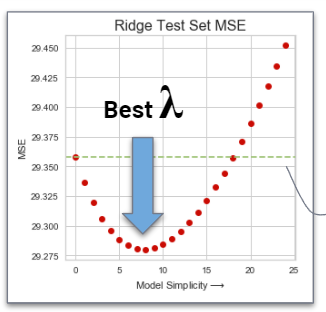

In [70]:
# Bulduğumuz best alpha değerinden daha büyük değerler scorlarımızı yukarıdaki grafikte gösterdiği gibi bozacak ve belli
# aşamdan sonra underfitinge sebep olacaktır.

## LASSO

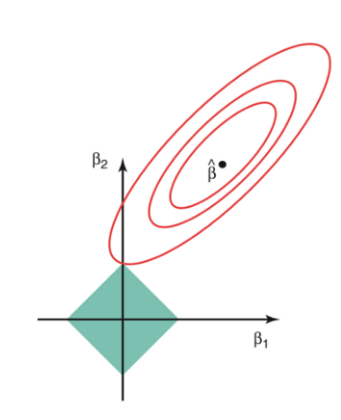

In [71]:
#ridge süründürür, lasso öldürür:)

In [72]:
from sklearn.linear_model import Lasso

In [73]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_scaled, y_train)

# Lasso modeli de datanın scale edilmiş halde verilmesini ister. Bu işlem tüm featurlara model tarafından
# eşit ağırlıklandırma yaparak hem multicolinarity sorununu gideriyor hemde feature selection işlemi yapmamızı sağlıyor

Lasso(alpha=1)

In [74]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [75]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

# data lasso algoritmasında modele sokulduktan sonra overfitingin giderildiğine dair bir insight elde ediyoruz.
# Ancak scorlarımız kötüleşmiş. Best alpha değerini bulak için gridsearchcv yapmamız gerekiyor
# Ancak, Kesin ve nihai kontrolümüzü CV'da yapacağımızı unutmuyoruz.
# bu sonuç bize ridgeye göre daha başarısız ve underfit diyebiliriz..

,lasso_train,lasso_test
R2,0.916066,0.918582
mae,1.021833,1.194105
mse,2.176931,2.569845
rmse,1.475443,1.603074


In [76]:
pd.concat([ls, rs, rgs, lss], axis = 1)

# ridge modelden aldığımız scorlara göre lasso'dan aldığımız scorlarda underfiting olduğunu görebiliyoruz.

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353,0.916066,0.918582
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962,1.021833,1.194105
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050,2.176931,2.569845
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698,1.475443,1.603074


In [77]:
1.6/y.mean()

# lasso rmse'e göre model ortlama %11 civarı hata yapıyor.

0.11410233553218041

## For Lasso CV with Default Alpha : 1

In [78]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10, return_train_score=True)

# Ridge modelde yaptığımız tüm işlemleri burda da tekrarlıyoruz.

In [79]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.001000,0.001000,0.706630,0.917901,-0.806709,-1.011725,-1.473267,-2.201218,-1.213782,-1.483650
2,0.000000,0.001000,0.918510,0.912366,-0.997634,-1.021604,-1.942615,-2.251644,-1.393777,-1.500548
3,0.000000,0.001000,0.962622,0.916147,-0.693933,-1.031761,-0.668914,-2.229095,-0.817872,-1.493015
4,0.001000,0.000000,0.933193,0.914841,-0.940894,-1.027563,-1.664037,-2.203442,-1.289976,-1.484399
5,0.000999,0.001000,0.928358,0.912803,-1.158430,-1.024222,-1.704932,-2.247654,-1.305730,-1.499218
6,0.001000,0.001001,0.866498,0.916798,-1.387719,-1.027112,-4.386342,-2.090716,-2.094360,-1.445931
7,0.001001,0.000000,0.928574,0.917464,-1.016796,-1.012382,-1.545570,-2.177084,-1.243209,-1.475495
8,0.001000,0.000000,0.941482,0.906374,-1.161680,-1.042144,-2.393813,-2.262532,-1.547195,-1.504172
9,0.001000,0.000000,0.811842,0.922793,-1.486293,-1.009553,-5.718008,-1.949948,-2.391236,-1.396405
10,0.001000,0.001000,0.905500,0.920835,-0.829083,-1.008444,-1.216981,-2.167804,-1.103169,-1.472346


In [80]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

# overfiting olmadığını gördük ama ridge modellerinden aldığımız score göre underfiting olduğunu teyit ettik.

test_r2                              0.890321
train_r2                             0.915832
test_neg_mean_absolute_error        -1.047917
train_neg_mean_absolute_error       -1.021651
test_neg_mean_squared_error         -2.271448
train_neg_mean_squared_error        -2.178114
test_neg_root_mean_squared_error    -1.440031
train_neg_root_mean_squared_error   -1.475518
dtype: float64

In [81]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

# cross validation'dan aldığımız validation scoreları ile test setinin tutarlı olduğunu gördük. Ancak underfiting 
# olduğundan gridsearc ile en iyi alpha değerini bulmaya çalışacağız.

,lasso_train,lasso_test
R2,0.916066,0.918582
mae,1.021833,1.194105
mse,2.176931,2.569845
rmse,1.475443,1.603074


In [82]:
lasso_model.coef_

# alpha = 1 default değeri ile 53 feature katsayısını 0 yapmış. Ridge önemsiz featurları 0'a yakınsatırken Lasso direk
# 0 yapar. Bu sebeple de lasso feature selection için tercih edilir.

array([0.69600691, 0.        , 0.        , 0.        , 3.44893766,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [83]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

# katsayıların okunuşunu kolaylaştırmak ve concate edebilmek için df'e dönüştürüyoruz.

In [84]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df], axis = 1)

# Ridge önemsiz feature katsayılarını 0'a yakınsatırken lasso direk 0 yapar.Bu sebpele Ridge featurları önemli ve önemsiz 
# olarak gruplandırmamızı sağlarken lasso direk feature selection yapmamıza olanak tanır.

# Ridge için featurları önemli ve önemsiz olarak gruplandırma işlemi iyi scoru veren hyperparametre üzerinden 
# yapılır.

# Lasso için de feature selection yapma işlemi en iyi scoru veren hyperparametre üzerinden yapılır.

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1
0,16.597275,3.714506,7.456255,0.696007
1,-5.404060,0.675148,0.137861,0.000000
2,-1.749283,0.245026,1.164867,0.000000
3,-62.338338,-1.036922,-10.181539,0.000000
4,16.908587,2.496200,4.616082,3.448938
5,-17.039680,0.250747,-1.255037,0.000000
6,18.331631,-0.038097,0.330428,0.000000
7,17.363422,0.163782,0.789013,0.000000
8,13.114621,-0.192793,-1.774795,0.000000
9,111.076623,-1.060227,3.106391,0.000000


## Choosing best alpha value with GridSearchCV for Lasso

In [85]:
lasso_model = Lasso(max_iter=100000)

# Lasso arka planda gradient descent algortiması çalıştırdığından min error noktasına ulaşamayınca iterasyon sayısı
# yetersiz kaldı diye hata verir. Bu hatayı alırsak max_iter'i arttırırız.

In [86]:
param_grid = {"alpha":alpha_space}

# ridge modelde yaptığımız işlemleri tekrarlıyoruz.

In [87]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2, return_train_score=True)

# ridge modelde yaptığımız işlemleri tekrarlıyoruz.

In [88]:
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END .........................................alpha=0.16; total time=   0.0s
[CV] END .........................................alpha=0.16; total time=   0.0s
[CV] END .........................................alpha=0.16; total time=   0.0s
[CV] END .........................................alpha=0.16; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=0.3; total time=   0.0s
[CV] END ..........................................alpha=0.3; total time=   0.0s
[CV] END ..........................................alpha=0.3; total time=   0.0s
[CV] END ..........................................alpha=0.3; total time=   0.0s
[CV] END ..........................................alpha=0.3; total time=   0.0s
[CV] END .........................................alpha=0.31; total time=   0.0s
[CV] END .........................................alpha=0.31; total time=   0.0s
[CV] END .........................................alpha=0.31; total time=   0.0s
[CV] END .........................................alpha=0.31; total time=   0.0s
[CV] END .........................................alpha=0.31; total time=   0.0s
[CV] END .........................................alpha=0.31; total time=   0.0s
[CV] END .........................................alpha=0.31; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.46; total time=   0.0s
[CV] END .........................................alpha=0.46; total time=   0.0s
[CV] END .........................................alpha=0.46; total time=   0.0s
[CV] END .........................................alpha=0.46; total time=   0.0s
[CV] END .........................................alpha=0.46; total time=   0.0s
[CV] END ..........................alpha=0.47000000000000003; total time=   0.0s
[CV] END ..........................alpha=0.47000000000000003; total time=   0.0s
[CV] END ..........................alpha=0.47000000000000003; total time=   0.0s
[CV] END ..........................alpha=0.47000000000000003; total time=   0.0s
[CV] END ..........................alpha=0.47000000000000003; total time=   0.0s
[CV] END ..........................alpha=0.47000000000000003; total time=   0.0s
[CV] END ..........................alpha=0.47000000000000003; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.62; total time=   0.0s
[CV] END .........................................alpha=0.62; total time=   0.0s
[CV] END .........................................alpha=0.62; total time=   0.0s
[CV] END .........................................alpha=0.62; total time=   0.0s
[CV] END .........................................alpha=0.62; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.78; total time=   0.0s
[CV] END .........................................alpha=0.78; total time=   0.0s
[CV] END .........................................alpha=0.78; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.9400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [89]:
grid_lasso.best_params_

# en iyi scoru dönderen alpha hyper parametresi 0.01 miş.

{'alpha': 0.01}

In [90]:
pd.DataFrame(grid_lasso.cv_results_)

# modelin her bir alpha değeri için datanın farklı 10 bölgesinden aldığı scorları ve ortalamalarını bu df'de gösteriyor.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003118,0.000458,0.000200,0.000400,0.01,{'alpha': 0.01},-0.640074,-0.455180,-0.453849,-0.568445,-0.312742,-0.766548,-0.355874,-0.505170,-1.460154,-0.357387,-0.587542,0.319524,1,-0.577553,-0.569384,-0.571601,-0.573763,-0.581370,-0.569556,-0.585592,-0.577237,-0.449411,-0.586038,-0.564150,0.038673
1,0.003751,0.000849,0.000201,0.000333,0.02,{'alpha': 0.02},-0.755804,-0.431334,-0.429478,-0.608526,-0.305372,-0.926101,-0.405952,-0.549365,-1.563317,-0.416638,-0.639189,0.355174,2,-0.649922,-0.638520,-0.636682,-0.632679,-0.648412,-0.641548,-0.644189,-0.638120,-0.537452,-0.643518,-0.631104,0.031617
2,0.001420,0.000721,0.000301,0.000460,0.03,{'alpha': 0.03},-0.783366,-0.463347,-0.445451,-0.640952,-0.335884,-0.994760,-0.468963,-0.606199,-1.587274,-0.483266,-0.680946,0.352629,3,-0.690306,-0.712693,-0.713191,-0.697518,-0.723460,-0.678278,-0.715932,-0.707379,-0.551486,-0.713394,-0.690364,0.048034
3,0.001203,0.000305,0.000100,0.000301,0.04,{'alpha': 0.04},-0.776570,-0.449286,-0.428381,-0.631607,-0.347871,-1.039017,-0.482644,-0.623430,-1.611260,-0.487520,-0.687759,0.362388,4,-0.707508,-0.730532,-0.728325,-0.718692,-0.738978,-0.694069,-0.732215,-0.723574,-0.569175,-0.729209,-0.707228,0.047681
4,0.001329,0.000832,0.000301,0.000459,0.05,{'alpha': 0.05},-0.819641,-0.449879,-0.413288,-0.638668,-0.364049,-1.114269,-0.502632,-0.644489,-1.658988,-0.506370,-0.711227,0.380164,5,-0.745398,-0.749058,-0.744671,-0.740694,-0.755226,-0.734619,-0.749776,-0.743618,-0.614395,-0.753398,-0.733085,0.039976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000451,0.000473,0.000300,0.000458,0.96,{'alpha': 0.9600000000000001},-1.181334,-1.350946,-0.785174,-1.256340,-1.265645,-2.057793,-1.216126,-1.500068,-2.359069,-1.079459,-1.405195,0.443365,96,-1.451735,-1.467034,-1.461424,-1.451418,-1.466782,-1.412255,-1.443838,-1.469580,-1.362133,-1.440980,-1.442718,0.031345
96,0.000707,0.000463,0.000303,0.000463,0.97,{'alpha': 0.97},-1.189395,-1.361578,-0.793297,-1.264663,-1.275626,-2.066898,-1.222854,-1.511752,-2.367082,-1.085341,-1.413848,0.443697,97,-1.459656,-1.475355,-1.469265,-1.459606,-1.474833,-1.420619,-1.451695,-1.478171,-1.370649,-1.448765,-1.450861,0.031251
97,0.000600,0.000490,0.000200,0.000400,0.98,{'alpha': 0.98},-1.197490,-1.372261,-0.801454,-1.273044,-1.285635,-2.076027,-1.229610,-1.523502,-2.375114,-1.091254,-1.422539,0.444030,98,-1.467617,-1.483714,-1.477144,-1.467833,-1.482923,-1.429020,-1.459591,-1.486800,-1.379201,-1.456588,-1.459043,0.031161
98,0.000500,0.000500,0.000300,0.000458,0.99,{'alpha': 0.99},-1.205620,-1.382994,-0.809646,-1.281482,-1.295670,-2.085181,-1.236396,-1.535317,-2.383165,-1.097197,-1.431267,0.444365,99,-1.475615,-1.492112,-1.485061,-1.476098,-1.491052,-1.437458,-1.467524,-1.495467,-1.387786,-1.464450,-1.467262,0.031075


In [91]:
grid_lasso.best_index_

# en iyi scorun alındığı df indexini döndürür.

0

In [92]:
pd.DataFrame(grid_lasso.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

# Overfiting olmadığını teyit ediyoruz.

mean_test_score    -0.587542
mean_train_score    -0.56415
Name: 0, dtype: object

In [93]:
grid_lasso.best_score_

# validation setinin scorunu alıyoruz.

-0.5875421384283496

In [94]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [95]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lgs

# test seti rmse scoru 0.565776 ile gridsearchten aldığımız validation seti scoru 0.5875421384283495 biribirine çok yakın
# olduklarından test seti scorunu da teyit etmiş olduk.

,grid_lasso_train,grid_lasso_test
R2,0.987457,0.989858
mae,0.354610,0.447532
mse,0.325331,0.320103
rmse,0.570378,0.565776


In [96]:
#GridSearchCV önce en iyi parametreleri bulur. Sonra bulduğu parametreler ile modeli eğitir.
#Bu nedenle son halinde en iyi parametreler vardır.

In [97]:
pd.concat([ls, rs, rgs, lss, lgs], axis = 1)

# Gördüğünüz gibi 11 feature ile en iyi rmse scorunu elde ettik. ML'de amacımız çoğunlukla min feature ile max scoru elde
# etmek olduğunu unutmayın. Fazla feature sayısı hem model için çalışma maliyeti getirir hem de modelde noise oluşturur.

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353,0.916066,0.918582,0.987457,0.989858
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962,1.021833,1.194105,0.354610,0.447532
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050,2.176931,2.569845,0.325331,0.320103
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698,1.475443,1.603074,0.570378,0.565776


In [98]:
lsm = Lasso(alpha=0.01).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
lsm.coef_

# grid modellerinin coef_ özelliği olmadığından grdisearch sonrası bulduğumuz en iyi hyperparametere göre manuel olarak 
# modeli yeniden kurup eğitiyoruz ve coef_leri elde ediyoruz.

array([ 4.55437318,  0.41386104,  0.14316515, -3.27936306,  3.48758515,
       -0.        ,  0.        ,  0.05343882,  0.        , -0.        ,
       -0.        , -0.21411016,  0.02441056, -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.09397831,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.40883055,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.0186714 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [99]:
lgm_df = pd.DataFrame(lsm.coef_, columns=["lasso_coef_0.01"])

In [100]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df], axis = 1)

# lasso'da uyguladığımız regularization kuvveti arttıkça katsayısı 0 olan feature sayısı da artıyor.
# feature selection işlemini en scoru veren hyperparameter üzerinden yapacağımızı unutmayın.

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1,lasso_coef_0.01
0,16.597275,3.714506,7.456255,0.696007,4.554373
1,-5.404060,0.675148,0.137861,0.000000,0.413861
2,-1.749283,0.245026,1.164867,0.000000,0.143165
3,-62.338338,-1.036922,-10.181539,0.000000,-3.279363
4,16.908587,2.496200,4.616082,3.448938,3.487585
5,-17.039680,0.250747,-1.255037,0.000000,-0.000000
6,18.331631,-0.038097,0.330428,0.000000,0.000000
7,17.363422,0.163782,0.789013,0.000000,0.053439
8,13.114621,-0.192793,-1.774795,0.000000,0.000000
9,111.076623,-1.060227,3.106391,0.000000,-0.000000


In [101]:
#lasso sadece 11 tane feature ie cok iyi bir sonuç almiş oldu. 
#bu durumda ridgr ile kıyaslayınca daha iyi bir seçim oldugunu söyleyebiliriz

## Elastic net

In [102]:
from sklearn.linear_model import ElasticNet

# ElasticNet, lasso ve ridge algortimalarının karışımıdır.
# ElasticNet modeli de datanın scale edilmiş halde verilmesini ister.

In [103]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

# modelimizi default değerleri ile eğitiyoruz. l1 = lasso, l2= ridge
# l1_rario=0.5 --> %50 lasso ,%50 ridge modeli kullarak eğitimi yap

# çok fazla tercih edilmez. Çoğunlukla lassoya yakınsar.

ElasticNet(alpha=1)

In [104]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [105]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

# en kötü scorları elasticnette aldık.ve underfit olduğunu görmüş oluyoruz lasso ve ridgeye göre..

,elastic_train,elastic_test
R2,0.894391,0.902784
mae,1.230023,1.386981
mse,2.739112,3.068501
rmse,1.655026,1.751714


In [106]:
pd.concat([ls,rs, rgs, lss, lgs, es], axis = 1)

# diğer model scorlarına baktığımızda burda bariz bir şekilde underfiting olduğunu görüyoruz.

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353,0.916066,0.918582,0.987457,0.989858,0.894391,0.902784
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962,1.021833,1.194105,0.354610,0.447532,1.230023,1.386981
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050,2.176931,2.569845,0.325331,0.320103,2.739112,3.068501
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698,1.475443,1.603074,0.570378,0.565776,1.655026,1.751714


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [107]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

# ridge ve lasso modellerinde yaptığımız işlemleri tekrar ediyoruz.

In [108]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.547624,0.897592,-1.018845,-1.217323,-2.271774,-2.745742,-1.507240,-1.657028
2,0.903256,0.891193,-1.109199,-1.227869,-2.306241,-2.795681,-1.518631,-1.672029
3,0.918673,0.893717,-1.121764,-1.240289,-1.455439,-2.825352,-1.206416,-1.680878
4,0.904224,0.893572,-1.185324,-1.234836,-2.385598,-2.753766,-1.544538,-1.659447
5,0.892673,0.891558,-1.435062,-1.228221,-2.554173,-2.795263,-1.598178,-1.671904
6,0.851579,0.895025,-1.571109,-1.227911,-4.876523,-2.637847,-2.208285,-1.624145
7,0.898629,0.893113,-1.307859,-1.246585,-2.193529,-2.819385,-1.481057,-1.679102
8,0.939770,0.885983,-1.192495,-1.229844,-2.463854,-2.755299,-1.569667,-1.659909
9,0.779346,0.903876,-1.668970,-1.195380,-6.705541,-2.427733,-2.589506,-1.558118
10,0.857503,0.898304,-1.064891,-1.238105,-1.835097,-2.784778,-1.354658,-1.668766


In [109]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

# overfiting olmadığını teyit ettik.

test_r2                              0.849328
train_r2                             0.894393
test_neg_mean_absolute_error        -1.267552
train_neg_mean_absolute_error       -1.228636
test_neg_mean_squared_error         -2.904777
train_neg_mean_squared_error        -2.734085
test_neg_root_mean_squared_error    -1.657818
train_neg_root_mean_squared_error   -1.653133
dtype: float64

In [110]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

# test seti scorelarının tutarlı olduklarını teyit ettik. (validation seti scorları ile karşılaştırarak)

,elastic_train,elastic_test
R2,0.894391,0.902784
mae,1.230023,1.386981
mse,2.739112,3.068501
rmse,1.655026,1.751714


In [111]:
elastic_model.coef_

array([0.85603327, 0.24929442, 0.        , 0.30397154, 0.97032476,
       0.05791825, 0.0121961 , 0.        , 0.        , 0.        ,
       0.51222851, 0.        , 0.59352013, 0.10500738, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15851285, 0.        , 0.24709461, 0.        , 0.        ,
       0.32883609, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03940337, 0.        , 0.        , 0.        , 0.13863323,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [112]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

# df'de dönüştürüyoruz.

In [113]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df, em_df], axis = 1)

# bazı featurlara lasso bazı featurlara ridge gibi davranıyor.

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1,lasso_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,16.597275,3.714506,7.456255,0.696007,4.554373,0.856033
1,-5.404060,0.675148,0.137861,0.000000,0.413861,0.249294
2,-1.749283,0.245026,1.164867,0.000000,0.143165,0.000000
3,-62.338338,-1.036922,-10.181539,0.000000,-3.279363,0.303972
4,16.908587,2.496200,4.616082,3.448938,3.487585,0.970325
5,-17.039680,0.250747,-1.255037,0.000000,-0.000000,0.057918
6,18.331631,-0.038097,0.330428,0.000000,0.000000,0.012196
7,17.363422,0.163782,0.789013,0.000000,0.053439,0.000000
8,13.114621,-0.192793,-1.774795,0.000000,0.000000,0.000000
9,111.076623,-1.060227,3.106391,0.000000,-0.000000,0.000000


## Choosing best alpha value with GridSearchCV for Elastic-Net

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
elastic_model = ElasticNet(max_iter=10000)

# Elasticnet de arka planda gradient descent algortiması çalıştırdığından min error noktasına ulaşamayınca iterasyon sayısı
# yetersiz kaldı diye hata verir. Bu hatayı alırsanız max_iter'i artırırsınız.

In [116]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

# 1'den fazla hyperparamereyi gridsearch'e sokarken hyperparametre uzayını istediğimiz kadar geniş tutamayız. Çünkü
# gridsearchcv çok maliyetli bir algortimadır. hem alpha, hem de l1_ratio hyperparameterlerinde 7 tane öğe var. 
# gridsearchcv 7x7x (cv sayısı) --> 7x7x10= 490 tane iterasyon yapacak demek. hyperparameter uzayları veya cv sayısı ne
# kadar büyük olursa maliyetde o kadar artar. Bu trade off'u iyi sağlamamız gerekiyor.

In [117]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2, return_train_score=True)

# gridsearchcv'ye 1'den fazla hyperparametre verildiğinde bu hyperparametrelerin tüm kombinasyonlarını dener ve en iyi 
# skoru veren hyperparameter kesişimlerini bize döndürür.

In [118]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01

[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [119]:
grid_model.best_params_

# Bulduğu en iyi hayper parametrelere baktığımızda tamamen lasso modeline yakınsadığını görüyoruz.

# gridsearch sonrası bulunan değerler sınır değerler çıkarsa sınır değerden itibaren hyperparameter uzayımızı yeniden 
# belirlememiz gerekiyor. alpha 0.01 sınır değeri çıktığında uazayımızı yeniden belirleyebilirdik ancak skorlarda çok
# fazla oynama olmadığından tekrar uzayımızı 0.01'den itibaren belirlemedik. Notebookun son kısmında skorlarımızın çok 
# değişmediğini göstereceğiz. Ancak best practice bu işlemi yapmamız gerekiyor.

{'alpha': 0.01, 'l1_ratio': 1}

In [120]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.021298,4.054360e-03,0.000300,0.000459,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-0.708995,-0.497416,-0.492460,-0.933867,-0.311012,-0.895848,-0.419949,-0.550828,-1.640591,-0.452782,-0.690375,0.370694,13,-0.617840,-0.615061,-0.617448,-0.598732,-0.629887,-0.597528,-0.628673,-0.624756,-0.493384,-0.626001,-0.604931,0.038711
1,0.002708,3.879644e-04,0.000000,0.000000,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-0.696573,-0.464931,-0.488251,-0.645618,-0.301419,-0.856338,-0.411330,-0.539318,-1.578926,-0.433894,-0.641660,0.347104,11,-0.618704,-0.612654,-0.612191,-0.604319,-0.624993,-0.601560,-0.625727,-0.621557,-0.485902,-0.623739,-0.603135,0.039893
2,0.002832,4.533952e-04,0.000500,0.000500,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-0.691543,-0.456031,-0.473748,-0.608671,-0.304173,-0.834613,-0.398742,-0.541070,-1.536383,-0.411820,-0.625679,0.337237,9,-0.611644,-0.605458,-0.605519,-0.601247,-0.617147,-0.598274,-0.619932,-0.613837,-0.479846,-0.618675,-0.597158,0.039734
3,0.003307,3.415521e-04,0.000351,0.000451,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-0.659791,-0.445560,-0.455700,-0.584536,-0.308523,-0.795746,-0.371122,-0.513933,-1.490508,-0.372763,-0.599818,0.328054,4,-0.594211,-0.586112,-0.586818,-0.588097,-0.597738,-0.581869,-0.600841,-0.592803,-0.462687,-0.600778,-0.579195,0.039313
4,0.003603,4.600797e-04,0.000164,0.000357,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-0.647349,-0.448045,-0.451054,-0.578595,-0.309869,-0.781653,-0.363053,-0.511787,-1.478962,-0.365116,-0.593548,0.325024,3,-0.587444,-0.578046,-0.580130,-0.580283,-0.589124,-0.575808,-0.593391,-0.585118,-0.457325,-0.594397,-0.572107,0.038729
5,0.004490,3.652987e-03,0.000550,0.000566,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-0.643226,-0.453766,-0.453322,-0.571015,-0.311849,-0.770197,-0.357469,-0.506857,-1.464278,-0.358732,-0.589071,0.320795,2,-0.579270,-0.571090,-0.573377,-0.575313,-0.583091,-0.570835,-0.586353,-0.578951,-0.451064,-0.587765,-0.565711,0.038631
6,0.003240,5.611260e-04,0.000403,0.000494,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-0.640074,-0.455180,-0.453849,-0.568445,-0.312742,-0.766548,-0.355874,-0.505170,-1.460154,-0.357387,-0.587542,0.319524,1,-0.577553,-0.569384,-0.571601,-0.573763,-0.581370,-0.569556,-0.585592,-0.577237,-0.449411,-0.586038,-0.564150,0.038673
7,0.016606,3.540015e-03,0.000300,0.000459,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-0.731227,-0.489926,-0.487782,-0.853313,-0.313691,-0.923805,-0.434313,-0.570283,-1.668642,-0.464401,-0.693738,0.373332,14,-0.635476,-0.635249,-0.635925,-0.619268,-0.649252,-0.615056,-0.646440,-0.643166,-0.509895,-0.643553,-0.623328,0.039255
8,0.002136,2.357567e-04,0.000201,0.000332,0.012,0.5,"{'alpha': 0.012, 'l1_ratio': 0.5}",-0.727567,-0.457801,-0.481290,-0.641157,-0.304465,-0.887413,-0.429666,-0.554474,-1.592805,-0.449894,-0.652653,0.351252,12,-0.637576,-0.636172,-0.634850,-0.626907,-0.647415,-0.620292,-0.646463,-0.640583,-0.500182,-0.644001,-0.623444,0.041866
9,0.002549,3.856529e-04,0.000434,0.000582,0.012,0.7,"{'alpha': 0.012, 'l1_ratio': 0.7}",-0.721583,-0.445557,-0.468102,-0.619241,-0.306544,-0.867406,-0.416801,-0.554678,-1.557080,-0.426421,-0.638341,0.343667,10,-0.631266,-0.630985,-0.629241,-0.624995,-0.640566,-0.617447,-0.640331,-0.632599,-0.496596,-0.638658,-0.618268,0.041117


In [121]:
grid_model.best_index_

6

In [122]:
pd.DataFrame(grid_model.cv_results_).loc[6, ["mean_test_score", "mean_train_score"]]

# skorlar lasso modeli ile aynı. Overfiting olmadığını teyit ettik.

mean_test_score    -0.587542
mean_train_score    -0.56415
Name: 6, dtype: object

In [123]:
grid_model.best_score_

# validation seti scorunu aldık.

-0.5875421384283496

In [124]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=0.01, l1_ratio=0.1)
y_train_pred = grid_model.predict(X_train_scaled)

In [125]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

# test seti rmse ile gridsearch validation rmse scorelarını karşılatırdık ve test seti scorunun tutarlı olduğunu
# teyit rttik.

,GridSearch_train,GridSearch_test
R2,0.987457,0.989858
mae,0.354610,0.447532
mse,0.325331,0.320103
rmse,0.570378,0.565776


## Final Model

In [126]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

# Fianl modelimizi tüm datayla eğiteceğimizden tüm datayı scalliyoruz.

In [127]:
final_model = Lasso(alpha=0.01) #grid_lasso

# En iyi scoru veren algortima lasso alpha=0.01 olduğundan final modelimizi bu şekilde oluşturyoruz.

In [128]:
final_model.fit(X_scaled, y)

# modeli tüm datayla eğitiyoruz.

Lasso(alpha=0.01)

## Prediction

In [129]:
new_sample = [[120, 30, 15]]

# yeni bir gözlem oluşturuyoruz.

In [130]:
poly_sample = polynomial_converter.transform(new_sample)
poly_sample

# model kaç featurla eğitildiyse prediciton alacağımız datanın feature sayısıda aynı olmalıdır. Bu sebeple yeni gözlemimizi
# eğitim datamızdaki gibi degree 5 üzerinden poly featurlara dönüştürüyoruz.

# polynomial_converter değişkeninin notebookun başında datamıza degree 5 üzerinden poly feature dönüşümü yapan algortima 
# olduğunu unutmayın. Burda sadece transform yaparak yeni gözlemimizi poly featurlara dönüştürebiliyoruz.

array([[1.20000e+02, 3.00000e+01, 1.50000e+01, 1.44000e+04, 3.60000e+03,
        1.80000e+03, 9.00000e+02, 4.50000e+02, 2.25000e+02, 1.72800e+06,
        4.32000e+05, 2.16000e+05, 1.08000e+05, 5.40000e+04, 2.70000e+04,
        2.70000e+04, 1.35000e+04, 6.75000e+03, 3.37500e+03, 2.07360e+08,
        5.18400e+07, 2.59200e+07, 1.29600e+07, 6.48000e+06, 3.24000e+06,
        3.24000e+06, 1.62000e+06, 8.10000e+05, 4.05000e+05, 8.10000e+05,
        4.05000e+05, 2.02500e+05, 1.01250e+05, 5.06250e+04, 2.48832e+10,
        6.22080e+09, 3.11040e+09, 1.55520e+09, 7.77600e+08, 3.88800e+08,
        3.88800e+08, 1.94400e+08, 9.72000e+07, 4.86000e+07, 9.72000e+07,
        4.86000e+07, 2.43000e+07, 1.21500e+07, 6.07500e+06, 2.43000e+07,
        1.21500e+07, 6.07500e+06, 3.03750e+06, 1.51875e+06, 7.59375e+05]])

In [131]:
scaled_sample = final_scaler.transform(poly_sample)
scaled_sample

# Eğitilen datamız scallendiği için prediction için kullanacağımız datanın da eğitim train datasının bilgilerine
# scale edilmelidir. 

array([[-0.31577196,  0.4548387 , -0.71597883, -0.57077539,  0.03272058,
        -0.57592103,  0.19000979, -0.40058135, -0.63510616, -0.65720536,
        -0.31206336, -0.55202038, -0.04766154, -0.38643187, -0.51941065,
        -0.03520625, -0.38068747, -0.49999458, -0.46689176, -0.65648983,
        -0.45750129, -0.52191971, -0.28669542, -0.40502644, -0.43636671,
        -0.15916772, -0.36507868, -0.43033507, -0.40034085, -0.19390994,
        -0.3974766 , -0.46387749, -0.40709947, -0.3333081 , -0.6202272 ,
        -0.49586916, -0.48043767, -0.39338379, -0.3965582 , -0.38051123,
        -0.3064592 , -0.37269676, -0.36480616, -0.32445027, -0.24449599,
        -0.37174771, -0.40748233, -0.35630191, -0.30216523, -0.29498002,
        -0.41062561, -0.44776182, -0.39109921, -0.3048257 , -0.24565976]])

In [132]:
final_model.predict(scaled_sample)

# predictionımızı alıyoruz.

array([14.49345346])

In [133]:
pd.DataFrame(X_train)

# data scallendingten sonra arraye dönüşür. Eğer scallenmiş datanızı df'e dönüştürmek istiyorsanız. Burdaki işlemi 
# yapmalısınız.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,116.0,7.7,23.1,13456.00,893.20,2679.60,59.29,177.87,533.61,1.560896e+06,103611.200,310833.600,6877.640,20632.920,61898.760,456.533,1369.599,4108.797,12326.391,1.810639e+08,1.201890e+07,3.605670e+07,7.978062e+05,2.393419e+06,7.180256e+06,5.295783e+04,1.588735e+05,4.766205e+05,1.429861e+06,3.515304e+03,1.054591e+04,3.163774e+04,9.491321e+04,2.847396e+05,2.100342e+10,1.394192e+09,4.182577e+09,9.254552e+07,2.776366e+08,8.329097e+08,6.143108e+06,1.842932e+07,5.528797e+07,1.658639e+08,4.077753e+05,1.223326e+06,3.669977e+06,1.100993e+07,3.302980e+07,2.706784e+04,8.120352e+04,2.436106e+05,7.308317e+05,2.192495e+06,6.577486e+06
1,177.0,9.3,6.4,31329.00,1646.10,1132.80,86.49,59.52,40.96,5.545233e+06,291359.700,200505.600,15308.730,10535.040,7249.920,804.357,553.536,380.928,262.144,9.815062e+08,5.157067e+07,3.548949e+07,2.709645e+06,1.864702e+06,1.283236e+06,1.423712e+05,9.797587e+04,6.742426e+04,4.639949e+04,7.480520e+03,5.147885e+03,3.542630e+03,2.437939e+03,1.677722e+03,1.737266e+11,9.128008e+09,6.281640e+09,4.796072e+08,3.300523e+08,2.271327e+08,2.519970e+07,1.734173e+07,1.193409e+07,8.212709e+06,1.324052e+06,9.111756e+05,6.270456e+05,4.315152e+05,2.969567e+05,6.956884e+04,4.787533e+04,3.294646e+04,2.267283e+04,1.560281e+04,1.073742e+04
2,43.1,26.7,35.1,1857.61,1150.77,1512.81,712.89,937.17,1232.01,8.006299e+04,49598.187,65202.111,30725.559,40392.027,53099.631,19034.163,25022.439,32894.667,43243.551,3.450715e+06,2.137682e+06,2.810211e+06,1.324272e+06,1.740896e+06,2.288594e+06,8.203724e+05,1.078467e+06,1.417760e+06,1.863797e+06,5.082122e+05,6.680991e+05,8.782876e+05,1.154603e+06,1.517849e+06,1.487258e+08,9.213409e+07,1.211201e+08,5.707611e+07,7.503263e+07,9.863841e+07,3.535805e+07,4.648193e+07,6.110546e+07,8.032965e+07,2.190394e+07,2.879507e+07,3.785420e+07,4.976338e+07,6.541928e+07,1.356926e+07,1.783825e+07,2.345028e+07,3.082790e+07,4.052656e+07,5.327649e+07
3,62.3,12.6,18.3,3881.29,784.98,1140.09,158.76,230.58,334.89,2.418044e+05,48904.254,71027.607,9890.748,14365.134,20863.647,2000.376,2905.308,4219.614,6128.487,1.506441e+07,3.046735e+06,4.425020e+06,6.161936e+05,8.949478e+05,1.299805e+06,1.246234e+05,1.810007e+05,2.628820e+05,3.818047e+05,2.520474e+04,3.660688e+04,5.316714e+04,7.721894e+04,1.121513e+05,9.385129e+08,1.898116e+08,2.756787e+08,3.838886e+07,5.575525e+07,8.097786e+07,7.764039e+06,1.127634e+07,1.637755e+07,2.378644e+07,1.570255e+06,2.280609e+06,3.312313e+06,4.810740e+06,6.987027e+06,3.175797e+05,4.612467e+05,6.699059e+05,9.729586e+05,1.413107e+06,2.052369e+06
4,224.0,2.4,15.6,50176.00,537.60,3494.40,5.76,37.44,243.36,1.123942e+07,120422.400,782745.600,1290.240,8386.560,54512.640,13.824,89.856,584.064,3796.416,2.517631e+09,2.697462e+07,1.753350e+08,2.890138e+05,1.878589e+06,1.221083e+07,3.096576e+03,2.012774e+04,1.308303e+05,8.503972e+05,3.317760e+01,2.156544e+02,1.401754e+03,9.111398e+03,5.922409e+04,5.639493e+11,6.042314e+09,3.927504e+10,6.473908e+07,4.208040e+08,2.735226e+09,6.936330e+05,4.508615e+06,2.930600e+07,1.904890e+08,7.431782e+03,4.830659e+04,3.139928e+05,2.040953e+06,1.326620e+07,7.962624e+01,5.175706e+02,3.364209e+03,2.186736e+04,1.421378e+05,9.238958e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,25.0,11.0,29.7,625.00,275.00,742.50,121.00,326.70,882.09,1.562500e+04,6875.000,18562.500,3025.000,8167.500,22052.250,1331.000,3593.700,9702.990,26198.073,3.906250e+05,1.718750e+05,4.640625e+05,7.562500e+04,2.041875e+05,5.513062e+05,3.327500e+04,8.984250e+04,2.425748e+05,6.549518e+05,1.464100e+04,3.953070e+04,1.067329e+05,2.881788e+05,7.780828e+05,9.765625e+06,4.296875e+06,1.160156e+07,1.890625e+06,5.104688e+06,1.378266e+07,8.318750e+05,2.246062e+06,6.064369e+06,1.637380e+07,3.6

## Feature importances with Ridge

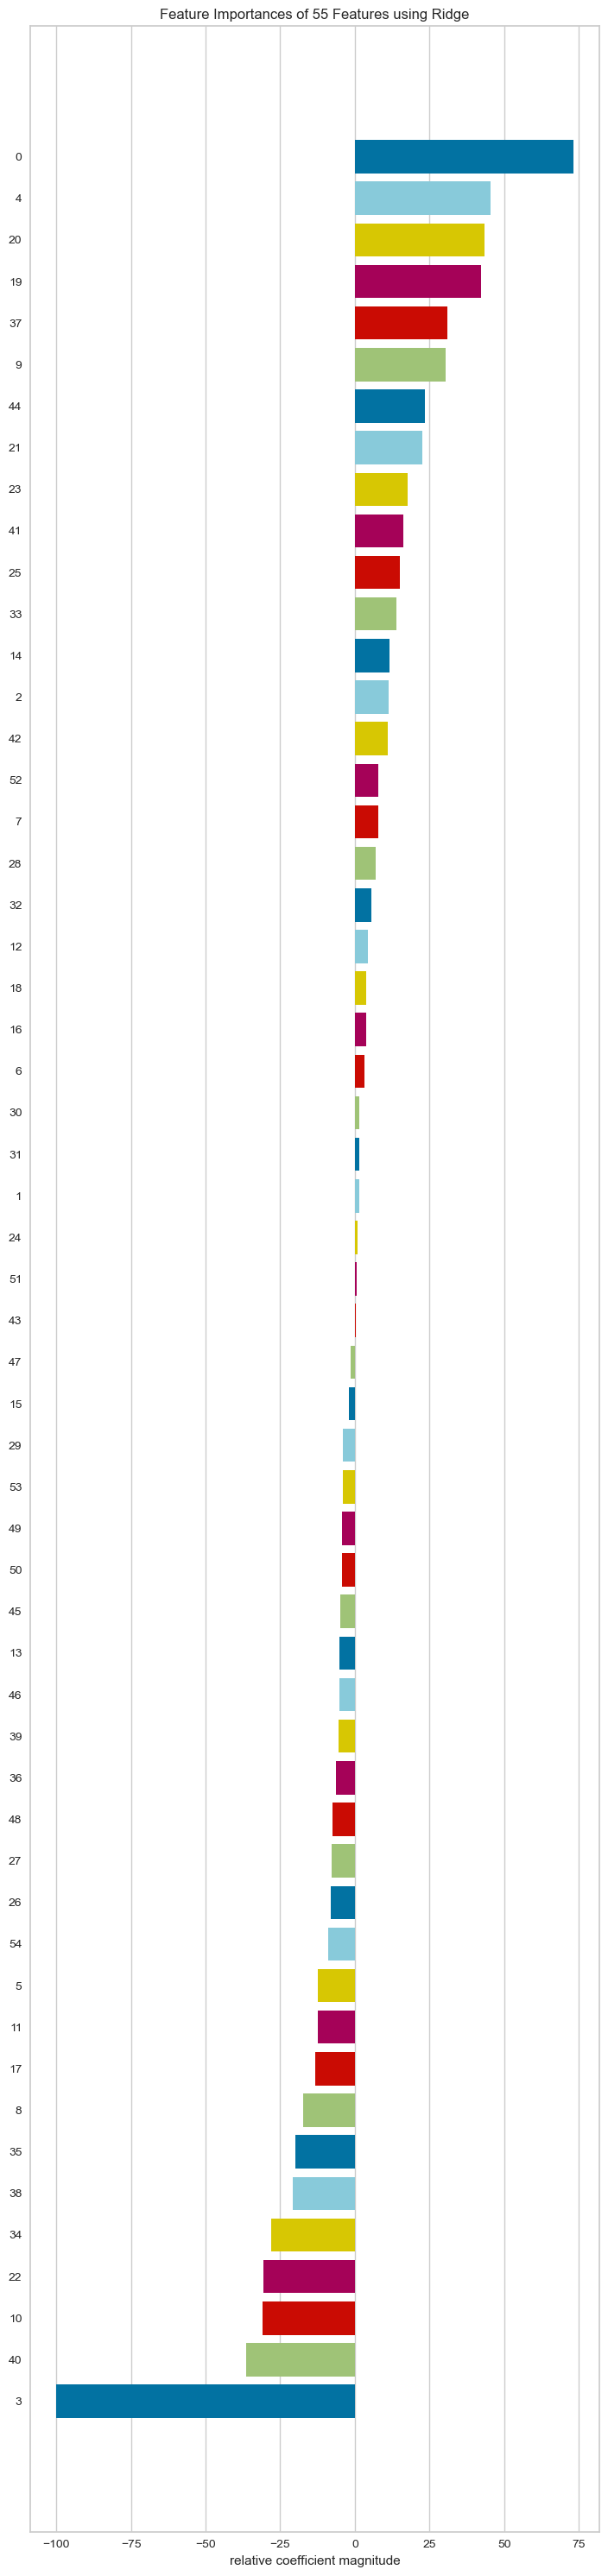

In [134]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz #görselin boyutunu ayarlıyor

model = Ridge(alpha=0.02)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# yellowbrick kütüphanesinin FeatureImportances fonksiyon üzerinden featurları önemlerine göre sıralayabilir veya feature
# selection yapabiliriz. Ridge modeli için en iyi scoru veren alpha=0.02 hyperparametresiyle modeli FeatureImportances
# fonksiyonunun içine veriyoruz.  labels olarak da df'in columns isimlerini veriyoruz.

# modelimiz train datası üzerinde eğitimi tamamladıktan viz.show() komutuyla görselimizi elde ediyoruz.
# Modelimiz ridge model olduğundan burda featurları önemli önemsiz olarak gruplandırabiliriz sadece. Kesinlikle
# feature selection yapamayız.

# visualizer = RadViz(size=(720, 3000)) komutu sadece görsel boyutuyla oynamak için kullanılıyor. 720,3000 sayıları
# değiştirilerek görseldeki değişimler gözlemlenebilir.

## Feature importances with Lasso

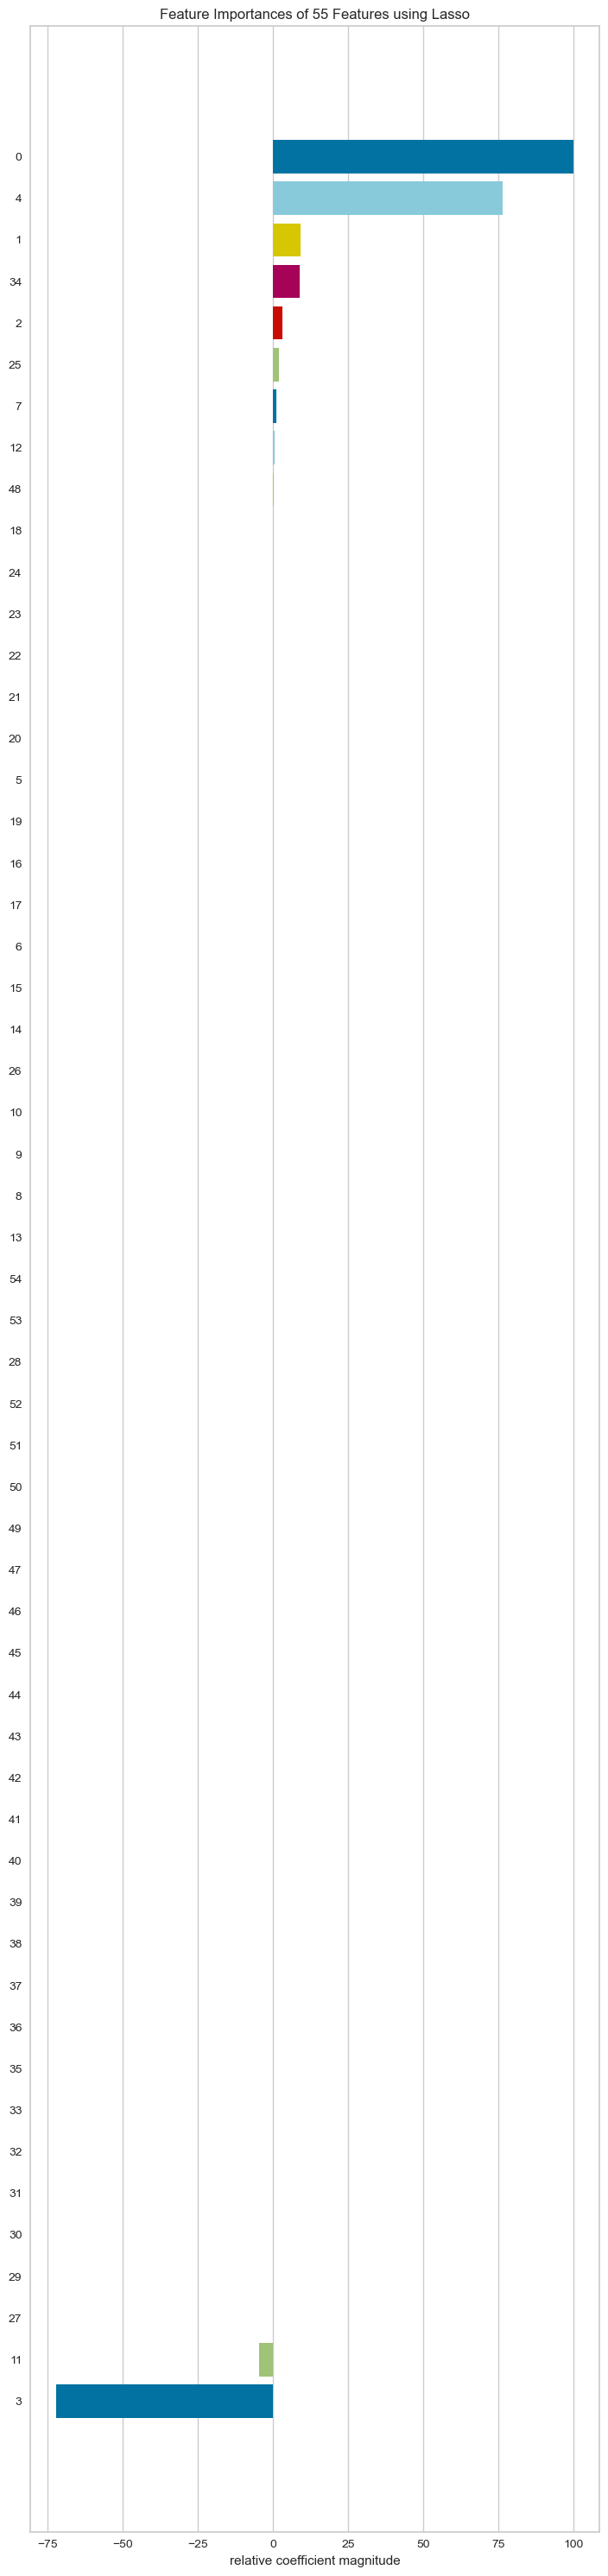

In [135]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# Lasso modeli için en iyi scoru veren alpha=0.01 hyperparametresiyle modeli FeatureImportances
# fonksiyonunun içine veriyoruz.  labels olarak da df'in columns isimlerini veriyoruz.

# lasso üzerinden feature selection yapabiliriz

## Feature Selection

In [136]:
X_new = pd.DataFrame(poly_features)[[0, 3, 4]]
X_new

# yukardaki görsele göre en öenmli 3 featurı seçiyoruz. X_new değişkenine atıyoruz.

,0,3,4
0,230.1,52946.01,8697.78
1,44.5,1980.25,1748.85
2,17.2,295.84,789.48
3,151.5,22952.25,6256.95
4,180.8,32688.64,1952.64
...,...,...,...
195,38.2,1459.24,141.34
196,94.2,8873.64,461.58
197,177.0,31329.00,1646.10
198,283.6,80428.96,11911.20


In [137]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.2, random_state=42)

# 3 featurli yeni datamızı train ve test setlerine bölüyoruz.

In [138]:
scaler_new = StandardScaler()
X_train_scaled2 = scaler_new.fit_transform(X_train2)
X_test_scaled2 = scaler_new.transform(X_test2)

# trian ve test setleri train setini bilgilerine göre scale ediliyor.

In [139]:
lasso_model2 = Lasso(alpha=0.01)
lasso_model2.fit(X_train_scaled2, y_train2)

# feature selection için kullandığımız modeldeki best hyperparametreler ne ise yaptığımız feature selection işlemi sonrası
# da aynı hyperparamtreleri kullanmaya devam ediyoruz.

Lasso(alpha=0.01)

In [140]:
y_pred2 = lasso_model2.predict(X_test_scaled2)
y_train_pred2 = lasso_model2.predict(X_train_scaled2)

# train ve test seti için predictionlarımızı alıyoruz.

In [141]:
train_val(y_train2, y_train_pred2, y_test2, y_pred2, "lasso_new")

# 3 featura göre gayet güzel scorlar elde ettik. Burda overfiting olmadığına dair insightımızı aldık. Teyit işlemini
# cross validation ile yapacağımızı unutmuyoruz.

,lasso_new_train,lasso_new_test
R2,0.982056,0.987284
mae,0.429271,0.515009
mse,0.465402,0.401370
rmse,0.682204,0.633538


In [142]:
y.mean()

14.022500000000003

In [143]:
0.56/14

# modelim 11 feature ile yaklaşık % 4 hata yapıyor.

0.04

In [144]:
0.63/14

# # modelim 11 feature ile yaklaşık % 4 hata yaparken 3 feature ile yaklaşık % 4.5 hata yapıyor.

0.045

## For Lasso alpha values < 0.01, scores is very close 0.01 alpha scores

In [145]:
lasso_model2 = Lasso(max_iter=1000000, alpha=0.001)

# Eleastiknet algortimasında hatırlarsanız alpha sınır değer çıkmasına rağmen skorlarımız çok değişmediğinden
# alpha için 0.01'i sınır değer alarak yeni bir uzay belirlememiştik. şimdi 0.01'den daha küçük bir alpha değeri (0.001)
# scorlarımızı kontrol edelim.

# alpha=0.001 için modeli yeniden kuruyoruz.

In [146]:
lasso_model2.fit(X_train_scaled, y_train)

# modelimizi eğitiyoruz

Lasso(alpha=0.001, max_iter=1000000)

In [147]:
y_pred = lasso_model2.predict(X_test_scaled)
y_train_pred = lasso_model2.predict(X_train_scaled)

# train ve test setinin predictionlarını alıyoruz.

In [148]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso_001")

# gördüğünüz gibi scorlarımız bir miktar daha iyileşti. Ancak aşağıdada göreceğiniz üzere feature sayımız fazladan 
# 10 tane arttı.

,lasso_001_train,lasso_001_test
R2,0.992339,0.991810
mae,0.290686,0.343706
mse,0.198689,0.258493
rmse,0.445746,0.508422


In [149]:
lasso_model2.coef_ #21 feature

# amacımızın çoğunlukla min feature ile max scoru elde etmek olduğunu unutmayın. Tabi bu husus contexten contexe değişir
# insan hayatıyla ilgili bir datayla uğraşıyorsunuzdur. Orda scorlarımızdaki çok ufak iyilşemler bile çok öenmlidir.
# o zaman en iyi scoru veren feature sayısı kaçsa o dikkate alınır. min feature ile  max score hedefi gözardı edilir.

array([  7.89061693,   0.33668296,   0.35602312, -12.66643218,
         3.94241649,  -0.72462246,   0.        ,   0.27745939,
        -0.        ,   7.58090336,  -0.01549864,   0.        ,
         0.        ,  -0.41254903,   0.        ,  -0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,   0.46843998,  -0.4171685 ,   0.        ,
         0.20756791,   0.30918104,  -0.        ,  -0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  -1.06042396,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.35431863,   0.        ,   0.        ,   0.        ,
         0.51367316,  -0.03312509,  -0.        ,   0.        ,
        -0.        ,  -0.27141665,  -0.        ,   0.        ,
         0.05685782,   0.        ,  -0.14749064])

In [150]:
y.mean()

14.022500000000003

In [151]:
0.50/14 # 21 features ile %3 hata yapıyor

0.03571428571428571

In [152]:
#ridge model, alpha=0.02, 55 features ile 0.04 hata  yapıyor.

#Lasso model, alpha=0.01, 11 features ile 0.04 hata  yapıyor.
#Lasso model, alpha=0.01, 3 features ile 0.044 hata  yapıyor.(feature selection)
#Lasso model, alpha=0.001, 21 features ile 0.035 hata  yapıyor.

So when should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net because they tend to reduce the useless features' weights down to zero, as we have discussed. In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.